<a href="https://colab.research.google.com/github/Khajisana/crazyflie-tools/blob/master/Example_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
!pip install tensorflow


In [ ]:
!pip install gradio


In [5]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import gradio as gr

### **Initialise and Load Dataset**

In [6]:
mnist = keras.datasets.mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### **Visualise the Test and Train data**

In [7]:
print(f'Training Images : {train_img.shape}')
print(f'Testing Images : {test_img.shape}')

Training Images : (60000, 28, 28)
Testing Images : (10000, 28, 28)


### **Function for plotting example Image of the Dataset with label**

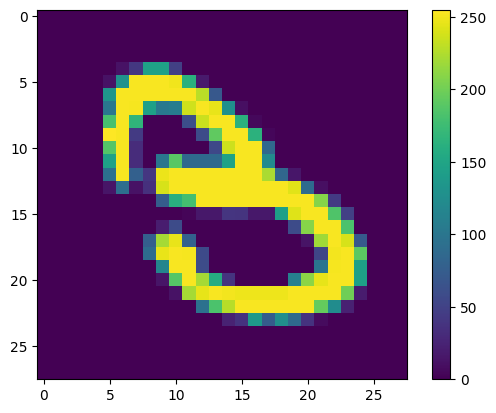

In [8]:
def plot_example(img_set, i):
    plt.figure()
    plt.imshow(img_set[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

plot_example(test_img, 18)


### **Preprocess and normalise the Training and Testing Images**

In [9]:
train_img, test_img = train_img/255, test_img/255

### **Plot first 50 images of the training dataset along with the labels**

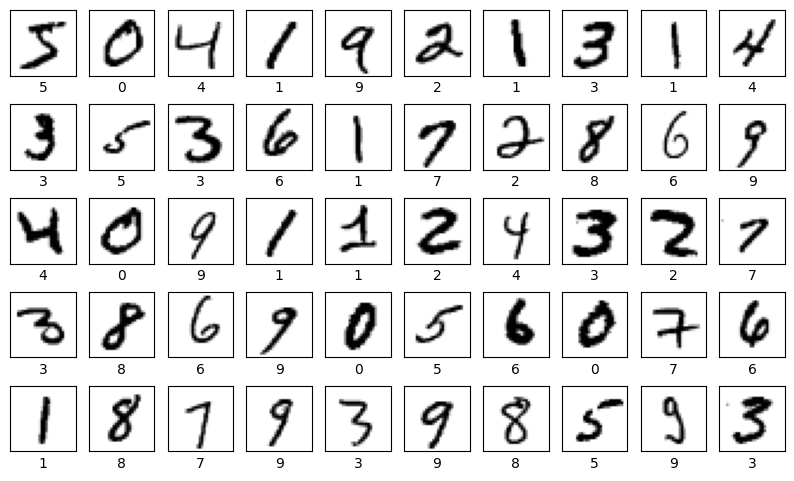

In [10]:
plt.figure(figsize=(10, 12))
for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

### **Creating a Sequential Model**

In [12]:
from tensorflow.keras import Sequential
model = Sequential()

### **Adding the Neural Layers**

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Softmax
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Softmax())

### **Compiling the Model and view the summary**

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [15]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Training the Model**

In [16]:
model.fit(train_img, train_label, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.3291 - accuracy: 0.9063
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1359 - accuracy: 0.9603
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0959 - accuracy: 0.9718
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0707 - accuracy: 0.9792
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0570 - accuracy: 0.9829
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0447 - accuracy: 0.9866
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 8/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0207 - accuracy: 0.9942

### **Evaluate the model against Test Data**

In [17]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose=2)
print(f'Test Accuracy : {str(test_acc*100)[:5]} %')

313/313 - 1s - loss: 0.0909 - accuracy: 0.9739 - 713ms/epoch - 2ms/step
Test Accuracy : 97.39 %


### **Make Prediction on the Model**


In [21]:
def classify(image):
    predictions = model.predict(image).tolist()[0]
    return {str(i): predictions[i] for i in range(10)}

sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(classify, sketchpad, label, live=True, capture_session=True)

interface.launch(share=True)


AttributeError: module 'gradio' has no attribute 'inputs'

In [ ]:
!pip install --upgrade gradio

In [22]:
import gradio as gr

def classify(image):
    # Your model prediction logic here
    return {str(i): predictions[i] for i in range(10)}

sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify, inputs=sketchpad, outputs=label, live=True, capture_session=True)

interface.launch()


AttributeError: module 'gradio' has no attribute 'inputs'

In [ ]:
predictions = model.predict(test_img)
for i in range(10, 21):
    predictions[i]

    predicted_label = np.argmax(predictions[i])

    true_label = test_label[i]

    plot_example(test_img, i)
    print(f'Predicted Value : {predicted_label}')
    print("----------------------------------------")

plt.figure(figsize=(15, 20))
for i in range(30, 60):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted : {np.argmax(predictions[i])}\nTrue : {test_label[i]}')
plt.show()